In [1]:
using Plots
using Random
using LaTeXStrings
include("../inflationBasicEqs.jl")
include("../inflationSDE.jl")
include("../sampling.jl")
include("../fitting.jl")

FitByBinAve (generic function with 1 method)

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
# We consider y=1-x, where x is in Eq. (4.15) in 2012.02031.
# y is a reflected Brownian motion with a reflective boundary at y=0 and an absorbing boundary at y=1
# y is simulated as |W(N)|, the absolute value of the standard Brownian motion W, which stops when |W|=1 (c.f. https://doi.org/10.1214/aoap/1177004597 p.891 §4.5)
dN = 0.001
mu = sqrt(7)
yIni = 0.0
vIni = 0.0
nPath = 1000000
iniVec = [yIni, vIni]

function drift!(driftVec, u, p, t)
    driftVec .= 0.0
end

function vol!(volVec, u, p, t)
    if abs(u[1]) < 1.0
        volVec[1] = sqrt(2.0) / mu
        volVec[2] = 0
    else
        volVec .= 0.0
    end
end

vol! (generic function with 1 method)

In [4]:
NsPsMin = 2.0
NsPsMax = 8.0
NSimEnd = 60.0

60.0

In [5]:
NTotFilePath = "NTot.csv"
NTotDf = SampleNTotAdd2Paths(nPath, iniVec, NSimEnd, [NsPsMin, NsPsMax], drift!, vol!, dN, NTotFilePath)

iPath=1 :2025-05-01T14:36:20.971
iPath=1001 :2025-05-01T14:36:48.115
iPath=2001 :2025-05-01T14:37:11.450
iPath=3001 :2025-05-01T14:37:32.456
iPath=4001 :2025-05-01T14:37:54.711
iPath=5001 :2025-05-01T14:38:39.350
iPath=6001 :2025-05-01T14:39:27.826
iPath=7001 :2025-05-01T14:40:16.094
iPath=8001 :2025-05-01T14:41:02.425
iPath=9001 :2025-05-01T14:41:50.503
iPath=10001 :2025-05-01T14:42:30.283
iPath=11001 :2025-05-01T14:42:53.757
iPath=12001 :2025-05-01T14:43:14.827
iPath=13001 :2025-05-01T14:43:37.759
iPath=14001 :2025-05-01T14:44:03.785
iPath=15001 :2025-05-01T14:44:27.844
iPath=16001 :2025-05-01T14:44:54.357
iPath=17001 :2025-05-01T14:45:22.025
iPath=18001 :2025-05-01T14:45:48.389
iPath=19001 :2025-05-01T14:46:14.603
iPath=20001 :2025-05-01T14:46:41.322
iPath=21001 :2025-05-01T14:47:09.422
iPath=22001 :2025-05-01T14:47:35.171
iPath=23001 :2025-05-01T14:48:01.630
iPath=24001 :2025-05-01T14:48:28.699
iPath=25001 :2025-05-01T14:48:56.179
iPath=26001 :2025-05-01T14:49:26.348
iPath=27001 :2

Row,NBk,NTot1,NTot2,phi_vel_vec_elem1,phi_vel_vec_elem2
,Float64,Float64,Float64,Float64,Float64
1,4.09545,0.611,1.486,0.0,0.0
2,3.15685,2.202,0.605,0.0,0.0
3,3.00627,6.362,9.158,-0.410097,0.0
4,2.0081,8.775,11.048,0.0794246,0.0
5,2.07477,3.389,4.727,0.148282,0.0
6,5.73929,2.219,9.325,0.0,0.0
7,7.40204,7.697,3.481,0.090531,0.0
8,6.38331,1.775,3.466,0.0,0.0
9,5.96855,1.559,0.878,0.0,0.0


In [6]:
fitResult, delNSqFit, psFit, delNSqErr, psErr = FitByLS(NTotDf, "exp+const", 1, NsPsMin, NsPsMax, basisFuncType="LegendreExcept0th", paramIni=[9.0, -0.1, -0.5])

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([8.489032031767396, -0.046973586238677596, -1.6316938250719188], [8.029391550751598, 7.085822234434572, 4.441294108500864, 5.66666970300029, 7.363326978967882, -16.79000729416805, -0.4110152479537579, 7.037155456012629, 8.229413846995046, 7.894887416344048  …  4.664621009382116, 4.999173115204327, -8.098440405948502, 8.395887191612582, 5.84982676554503, 2.800404451089859, 5.130082030352965, 3.9865076022128427, -14.717757948769984, 2.7259841356576144], [1.0 1.6355570687209784 0.02316494395655472; 1.0 2.725048427910674 0.07864437683648359; … ; 1.0 0.9786772569879194 -0.00060725271127943; 1.0 2.4457872031784778 0.06297229192606515], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[]), var"#96#174"(Core.Box(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{Lsq

In [7]:
fitResult.param

3-element Vector{Float64}:
  8.489032031767396
 -0.046973586238677596
 -1.6316938250719188

In [8]:
confidence_interval(fitResult, 0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (8.367207141004636, 8.610856922530155)
 (-0.18461058937336933, 0.09066341689601415)
 (-4.504096192947646, 1.2407085428038085)

In [9]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitVals = [delNSqFit(N) for N in NsPS]
psFitVals = [psFit(N) for N in NsPS]
delNSqErrVals = [delNSqErr(N) for N in NsPS]
psErrVals = [psErr(N) for N in NsPS]

100-element Vector{Float64}:
 NaN
   0.11656327870944132
   0.10937293360671332
   0.10253980894912648
   0.09604915632115385
   0.08988690307742932
   0.08403963741299761
   0.07849459592720247
   0.07323965394115574
   0.06826331887893838
   0.06355472707523271
   0.05910364442228615
   0.05490047130802996
   ⋮
   0.012440304800554462
   0.01223948406637843
   0.012038706747345175
   0.011838173275054428
   0.011638071726959845
   0.011438578350296307
   0.011239858072082708
   0.011042064994730847
   0.010845342876940034
   0.010649825599682694
   0.010455637617192114
 NaN

In [10]:
NBksBin = LinRange(NsPsMin, NsPsMax, 11)
delNSqBinAve, psBinAve, delNSqBinAveErr, psBinAveErr, NBksdelNSq, NBksPS = FitByBinAve(NTotDf, NBksBin)

(Any[8.25774472017774, 8.41614972898886, 8.385798690733138, 8.346417853344182, 8.425414975320704, 8.443102355232137, 8.479915660889429, 8.49756832061705, 8.517623856716618, 8.412968286683132], [0.26400834801853174, -0.050585063759536184, -0.06563472898159319, 0.13166186996087065, 0.029478966519054225, 0.06135550942881981, 0.029421099546036424, 0.03342589349927924, -0.17442595005581044], Any[0.05908747564599954, 0.06119422385567497, 0.05937168099946273, 0.05850281142619631, 0.06022344490744877, 0.05935624580307871, 0.06042496465892428, 0.058845087171862404, 0.05925027390216731, 0.05922644453947399], [0.14177508411717019, 0.14210451492163179, 0.13892019541080095, 0.13993492794559106, 0.14092972275763715, 0.1411691289618762, 0.14057343512176912, 0.1391775369182382, 0.13962615452889054], LinRange{Float64}(2.3, 7.7, 10), LinRange{Float64}(2.5999999999999996, 7.4, 9))

In [11]:
function delNSqFlatAnalytic(Nbk)
    return mu^4 / 6 - 0.02 * 4 * mu^4 / pi^2 * exp(-pi^2 / 4 / mu^2 * Nbk)
end

delNSqAnals = [delNSqFlatAnalytic(N) for N in NsPS]

100-element Vector{Float64}:
 7.970411552032954
 7.974559641770233
 7.978620056602832
 7.982594649646135
 7.986485234847688
 7.9902935878150565
 7.994021446626187
 7.9976705126226415
 8.001242451186066
 8.00473889249825
 8.008161432285108
 8.011511632544961
 8.014791022261393
 ⋮
 8.136717821343815
 8.137350826492032
 8.137970452309148
 8.138576981583544
 8.139170691126523
 8.139751851898652
 8.140320729133409
 8.14087758245825
 8.141422666013083
 8.141956228566265
 8.14247851362813
 8.142989759562129

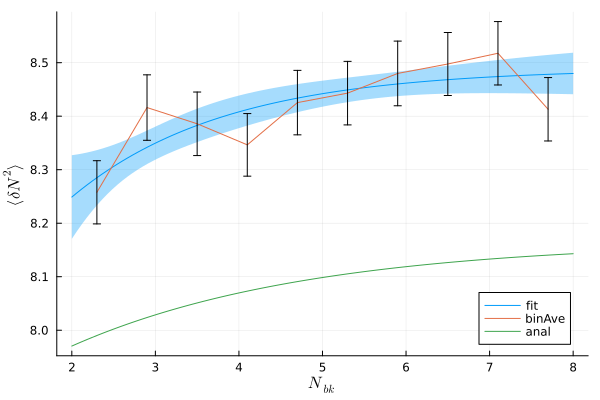

In [12]:
plot(NsPS, delNSqFitVals, ribbon = delNSqErrVals, fillalpha = 0.35, label="fit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="binAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")
plot!(NsPS, delNSqAnals, label="anal")

In [13]:
function PSFlatAnalytic(Nbk)
    exponent = pi^2 / mu^2 * Nbk
    q = exp(-exponent)
    nCutoff = Int64(ceil(5.0 / exponent))
    firstTerm = 4 * mu^2 / 3 * 2 * sum([q^((n + 0.5)^2) for n in 0:nCutoff])
    secondTerm = 8 * mu^2 / pi^3 * sum([q^((n + 0.5)^2) / (n + 0.5)^2 * (5 * (-1)^n / (n + 0.5) - 4 * pi) for n in 0:nCutoff])
    return firstTerm + secondTerm
end

psAnals = [PSFlatAnalytic(N) for N in NsPS[2:end]]

99-element Vector{Float64}:
 0.0696537072572152
 0.06686607038929004
 0.06436745538984034
 0.062111498031010015
 0.06005985845409256
 0.058180818066334794
 0.05644812240553332
 0.05484002670729016
 0.0533385085779452
 0.05192861846165453
 0.05059794375149895
 0.04933616663899976
 0.04813469928999403
 ⋮
 0.009525265395842197
 0.009323937294162699
 0.009126864518464561
 0.008933957125086156
 0.00874512707181796
 0.008560288177643427
 0.008379356083348277
 0.008202248212966667
 0.00802888373605426
 0.007859183530761538
 0.007693070147696934
 0.007530467774553795

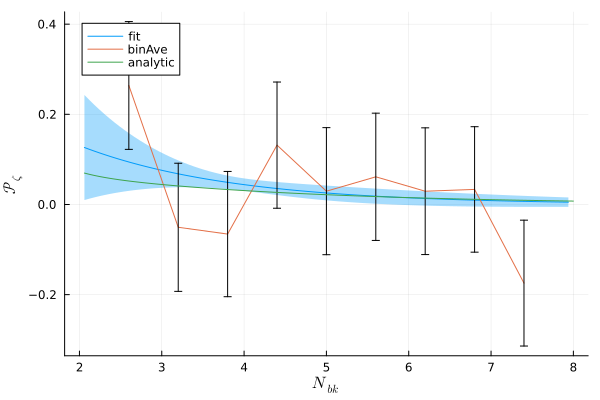

In [14]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="fit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="binAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPS[2:end], psAnals, label="analytic")

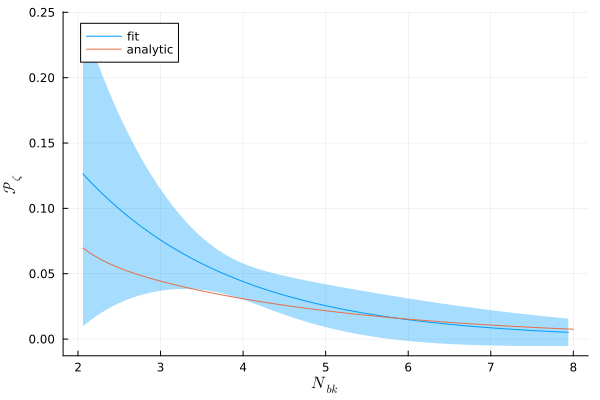

In [15]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="fit")
plot!(NsPS[2:end], psAnals, label="analytic", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")

In [16]:
NTotDf_Nbk3to8 = subset(NTotDf, :NBk => x -> x .>= 3.0)
fitResult_Nbk3to8, delNSqFit_Nbk3to8, psFit_Nbk3to8, delNSqErr_Nbk3to8, psErr_Nbk3to8 = FitByLS(NTotDf_Nbk3to8, "exp+const", 1, 3, 8, basisFuncType="LegendreExcept0th", paramIni=[8.5, -0.05, -1.0])

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([8.531587795080753, -0.08493797769749438, -0.6950235428496123], [8.023263500073963, 7.093450234710016, 4.452881327995268, -16.79550153156994, -0.40579585107552063, 7.035403647314544, 8.225143175781021, 7.886710863802168, -35.711574245189425, 8.450381795719004  …  4.669708309091086, 5.0001351081886884, -8.099958426583964, 8.404288690571486, 5.855194692481918, 2.8084730063387813, 5.126673659105747, 3.987631756391412, -14.725765547479682, 2.7292543285479196], [1.0 1.477687583448782 0.07051509002113032; 1.0 1.91825923794927 0.1527107250530117; … ; 1.0 1.1365392156829952 0.017776883876862052; 1.0 1.8151240553677337 0.1322412789938511], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[]), var"#96#174"(Core.Box(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{Ls

In [17]:
fitResult_Nbk3to8.param

3-element Vector{Float64}:
  8.531587795080753
 -0.08493797769749438
 -0.6950235428496123

In [20]:
confidence_interval(fitResult_Nbk3to8, 0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (7.944643945411152, 9.118531644750355)
 (-0.7104782711428045, 0.5406023157478158)
 (-5.1903967536293365, 3.800349667930112)

In [18]:
NsPS_Nbk3to8 = LinRange(3, 8, 100)
delNSqFitVals_Nbk3to8 = [delNSqFit_Nbk3to8(N) for N in NsPS_Nbk3to8]
psFitVals_Nbk3to8 = [psFit_Nbk3to8(N) for N in NsPS_Nbk3to8]
delNSqErrVals_Nbk3to8 = [delNSqErr_Nbk3to8(N) for N in NsPS_Nbk3to8]
psErrVals_Nbk3to8 = [psErr_Nbk3to8(N) for N in NsPS_Nbk3to8]

100-element Vector{Float64}:
 NaN
   0.08950297226644559
   0.08622082258373322
   0.083017552879651
   0.07989188270718577
   0.07684257691483092
   0.07386844745972548
   0.07096835554569995
   0.0681412141363916
   0.06538599090216884
   0.0627017116696378
   0.060087464454216415
   0.05754240416983846
   ⋮
   0.03122341210999114
   0.03139692774168306
   0.031560278277324154
   0.031713661982674696
   0.03185727779315927
   0.03199132485493438
   0.03211600212202258
   0.03223150800281177
   0.03233804005008589
   0.03243579468949756
   0.03252496698203521
 NaN

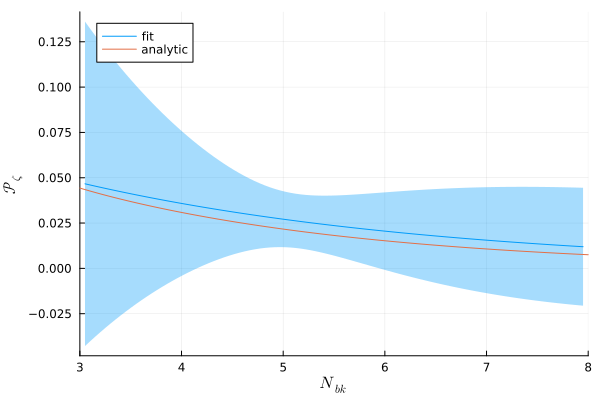

In [19]:
plot(NsPS_Nbk3to8, psFitVals_Nbk3to8, ribbon = psErrVals_Nbk3to8, fillalpha = 0.35, label="fit")
plot!(NsPS[2:end], psAnals, label="analytic", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta", xlims=(3,8))

In [21]:
NTotDf_Nbk4to8 = subset(NTotDf, :NBk => x -> x .>= 4.0)
fitResult_Nbk4to8, delNSqFit_Nbk4to8, psFit_Nbk4to8, delNSqErr_Nbk4to8, psErr_Nbk4to8 = FitByLS(NTotDf_Nbk4to8, "exp+const", 1, 4, 8, basisFuncType="LegendreExcept0th", paramIni=[8.5, -0.05, -1.0])

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([8.484035903857862, -0.011888560373888907, -2.522126631672706], [7.969942923882515, -16.780098395437832, -0.405321031081332, 7.046963724088238, 8.239785895944786, 7.880346100248401, -35.721586855231386, 8.465744911138708, 8.453515457972157, 5.931051273690684  …  -37.769927690690324, -4.822101206291796, 4.67039759831695, -8.088736559938656, 8.399665621721962, 5.855428563731326, 2.8043758929871583, 5.140414452311352, 3.9947649609427724, -14.716693698149589], [1.0 11.04258849235673 0.125015188821621; 1.0 1.3892598240145584 0.002152977528682218; … ; 1.0 0.35819668499038343 -0.0017334690874420587; 1.0 3.357143400531833 0.01916500098776443], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[]), var"#96#174"(Core.Box(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vect

In [23]:
fitResult_Nbk4to8.param

3-element Vector{Float64}:
  8.484035903857862
 -0.011888560373888907
 -2.522126631672706